# Fundamentals of Bioimage Analysis: I/O and Processing

## Introduction

Welcome to the 2nd notebook of the P2N2025 bioimage analysis course! This notebook will teach you the essential skills for reading and writing bio-image data using Python.

## Learning Objectives

By completing this notebook, you will be able to:

1. **Read and write** microscopy files in various formats (CZI, OME-TIFF, etc.)
2. **Navigate and understand** image metadata including pixel sizes and channel information
3. **Visualize** multidimensional microscopy data using matplotlib and stackview

## Course Structure

This notebook is divided into three main chapters:

**Chapter 1: Reading and Writing Files**
- Objective: Master the fundamentals of microscopy file I/O
- Key Skills: Using bioio for unified file access, understanding metadata, handling different file formats
- Take-Home: Bioio provides a standardized way to access diverse microscopy formats

**Chapter 2: Visualization**
- Objective: Learn effective strategies for visualizing multidimensional data
- Key Skills: 2D plotting with matplotlib, 3D visualization with stackview, creating publication-quality figures
- Take-Home: Proper visualization is essential for understanding your data and debugging analysis pipelines

## Why This Matters

Modern microscopy generates complex, multidimensional datasets that require computational tools to extract meaningful information. This notebook teaches you the fundamental skills to start with reading and writing files, and basic visualization.

**Let's begin!**

In [ ]:
!which python

/usr/local/bin/python


## Preparations
### Library installations on Google Colab
When using Google Colab, we have to make sure that all the libraries that we will use are available in its runtime environment.
Unlike local Python environments that we can reuse after a session, Google Colab will reset the environment after a certain amount of time.
Therefore, each time we start a new Google Colab session, we have to install the libraries in the runtime environment. Luckily, Google Colab already comes with many libraries pre-installed. So, we only have to install the libraries that are not pre-installed.

The following code cell will install all required libraries for this notebook.

In [1]:
# Pre-installed libraries (will be skipped automatically)
!pip install numpy
!pip install matplotlib

# To install
!pip install bioio==3.0.0 bioio-czi==2.4.0 bioio-ome-tiff==1.4.0
!pip install stackview

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.5/458.5 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.1/224.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.

### Download the image dataset
We will work with a demo microscopy dataset in which HeLa cells have been stained using DAPI, and tubulin and mitochondria antibodies. Hereto, we will download the image dataset into our Google Drive.

In [2]:
import gdown

# a file
url = "https://drive.google.com/uc?id=1tR0yOZ7vOwMz43RacDNw77oGi50pbBrd"
image_path = "/content/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"
gdown.download(url, image_path)

Downloading...
From: https://drive.google.com/uc?id=1tR0yOZ7vOwMz43RacDNw77oGi50pbBrd
To: /content/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi
100%|██████████| 88.2M/88.2M [00:01<00:00, 59.4MB/s]


'/content/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi'

# Chapter 1: Reading and Writing Files
In this chapter, we will learn how to read and write microscopy files in various formats.
Hereto, we will use the convenient `bioio` library that will handle a lot of the heavy lifting for us.
It provides a unified interface for reading and writing microscopy files in various formats.

## 1.1. Reading Files

**Importing the `bioio` library**

We will start by reading files using the `bioio` library. The following code cell will import all the elements from `bioio` that we will use to read files in this notebook.

In [3]:
# Bioio imports
from bioio import BioImage
from bioio_ome_tiff.writers import OmeTiffWriter
import bioio_base as biob

**Reading a file**

We can now define a variable containing the path to the image file that we want to read. In this example, we have a .czi file, which is a file format used by Zeiss microscopes.

```python
image_path = "/content/sample_data/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"
```

We can then use the `BioImage` class to read the file.

```python
img = BioImage(image_path)
```
A microscopy image file can contain multiple acquisitions, called scenes in `bioio`. We can specify which scene we want to read, but by default, the first scene will be read.

We can then print the id of the current scene using the `current_scene` attribute.

```python
print(img.current_scene)
```

We can also get a list of all the scenes in the file using the `scenes` attribute.

```python
print(img.scenes)
```

In [5]:
# Define the path to the image file
image_path = "/content/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"

# Define a BioImage object
img = BioImage(image_path)  # selects the first scene found

# Get the id of the current operating scene
print(f'Current scene: {img.current_scene}')

# Get a list valid scene ids
print(f'Scenes: {img.scenes}')

Current scene: 0
Scenes: ('0', '1', '2', '3')


**Changing the scene**

To read another acquisition, a.k.a. scene, we can use the `set_scene` method.

This can be done by specifying the scene id, a string that is the name of the scene.
```python
img.set_scene("1")
```

We can also use the `set_scene` method with the scene index.

```python
img.set_scene(1)
```

In [7]:
# Change scene using name
img.set_scene("1")
# Or by scene index
img.set_scene(1)

print(f'Current scene: {img.current_scene}')

Current scene: 1


**Accessing image metadata**

The `BioImage` class provides a lot of metadata about the image. We can access it as attributes of our `img` object.

In [11]:
# Access all the metadata
print(img.metadata)  # returns the metadata object for this file format (XML, JSON, etc.)

<Element 'ImageDocument' at 0x7be205306840>


In [9]:
print(img.ome_metadata) # returns the OME-XML metadata as a string

experimenters=[{'id': 'Experimenter:u0119446', 'user_name': 'u0119446'}] instruments=[<1 field_type>] images=[<4 field_type>] structured_annotations={'xml_annotations': [{'description': 'AIMApplication14.0.29.201', 'id': 'urn:lsid:allencell.org:Annotation:AcquisitionSoftware', 'value': {}, 'kind': 'xmlannotation'}]}


In [12]:
# Access specific metadata
print(f'Dimensions object: {img.dims}')  # returns a Dimensions object
print(f'Dimension order: {img.dims.order}')  # returns string "TCZYX"
print(f'Size of X dimension: {img.dims.X}')  # returns size of X dimension
print(f'Shape: {img.shape}')  # returns tuple of dimension sizes in TCZYX order

print(f'Channel names: {img.channel_names}')  # returns a list of string channel names found in the metadata
print(f'Z dimension pixel size: {img.physical_pixel_sizes.Z}')  # returns the Z dimension pixel size as found in the metadata
print(f'Y dimension pixel size: {img.physical_pixel_sizes.Y}')  # returns the Y dimension pixel size as found in the metadata
print(f'X dimension pixel size: {img.physical_pixel_sizes.X}')  # returns the X dimension pixel size as found in the metadata

Dimensions object: <Dimensions [T: 1, C: 3, Z: 14, Y: 512, X: 512]>
Dimension order: TCZYX
Size of X dimension: 512
Shape: (1, 3, 14, 512, 512)
Channel names: [np.str_('Ch2-T1'), np.str_('ChS1-T2'), np.str_('Ch1-T3')]
Z dimension pixel size: 1.0
Y dimension pixel size: 0.4151329104819196
X dimension pixel size: 0.4151329104819196


## 1.2. Writing Files

We can also write files using the `bioio` library.

Hereto, we first define the output path, i.e. the path where we want to write the file to.
```python
output_path="/content/images/output.ome.tiff"
```

We can then use the `write_file` method to write the file.

```python
img.write_file("output.ome.tiff")
```

In this case, we are writing the image into an OME-TIFF file that will use the same metadata as the original file.


In [15]:
# Define the output path
output_path="/content/output.ome.tiff"

# Write the file
img.save(output_path)

**Creating a new image file from scratch**

In most cases, we are not just opening an existing file and saving it again.
Often, we have data stored in memory, like a numpy array, that we want to save as a file.
To store metadata together with the raw data, we can use the `bioio` library to create an image file from scratch.

As an example, we will extract the raw data from our image as a numpy array.

In [16]:
# Get the raw data as a numpy array
data = img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array
print(f'Data type: {type(data)}')
print(f'Numpy array shape: {data.shape}')

Data type: <class 'numpy.ndarray'>
Numpy array shape: (3, 14, 512, 512)


We can now write the data to a new file. Hereto, we will import the `OmeTiffWriter` class from the `bioio` library that allows us to create a new OME-TIFF file from scratch.

We will also define the metadata that we want to stored in the new file. To do this in a standardized way, we will also import `bioio_base` that contains the base classes for the metadata. For convenience, we call it `biob`.

In [18]:
# Import the OmeTiffWriter class
from bioio.writers import OmeTiffWriter
import bioio_base as biob

# Get the raw data as a numpy array
data = img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array
print(f'Numpy array shape: {data.shape}')

# Define the output path
output_path="/content/output.ome.tiff"

# Define the metadata
write_dim_order = "CZYX"  # required, the dimension order to write the data in
channel_names = ['Mitochondria', 'Tubulin', 'DAPI']
channel_colors = [(255,0,255), (0,255,0), (0,255,255)]  # Magenta/Green/Cyam, colors in RGB format
pixel_size = biob.types.PhysicalPixelSizes(
    img.physical_pixel_sizes.Z,
    img.physical_pixel_sizes.Y,
    img.physical_pixel_sizes.X
    )  # optional, Z, Y, X in microns

# Write the file
OmeTiffWriter.save(
        data,
        output_path,
        write_dim_order,
        channel_names=channel_names,
        channel_colors=channel_colors,
        physical_pixel_sizes=pixel_size,
    )

Numpy array shape: (3, 14, 512, 512)


**Reading the stored file**

We can now read the file we just wrote using the `BioImage` class.

In [20]:
img = BioImage(output_path)
print(f'Dimensions object: {img.dims}')  # returns a Dimensions object
print(f'Dimension order: {img.dims.order}')  # returns string "TCZYX"
print(f'Size of X dimension: {img.dims.X}')  # returns size of X dimension
print(f'Shape: {img.shape}')  # returns tuple of dimension sizes in TCZYX order

print(f'Channel names: {img.channel_names}')  # returns a list of string channel names found in the metadata
print(f'Z dimension pixel size: {img.physical_pixel_sizes.Z}')  # returns the Z dimension pixel size as found in the metadata
print(f'Y dimension pixel size: {img.physical_pixel_sizes.Y}')  # returns the Y dimension pixel size as found in the metadata
print(f'X dimension pixel size: {img.physical_pixel_sizes.X}')  # returns the X dimension pixel size as found in the metadata

Dimensions object: <Dimensions [T: 1, C: 3, Z: 14, Y: 512, X: 512]>
Dimension order: TCZYX
Size of X dimension: 512
Shape: (1, 3, 14, 512, 512)
Channel names: [np.str_('Mitochondria'), np.str_('Tubulin'), np.str_('DAPI')]
Z dimension pixel size: 1.0
Y dimension pixel size: 0.4151329104819196
X dimension pixel size: 0.4151329104819196


# Chapter2: Visualisation
Now that we know how to read and write files, we can start visualising the data. In this chapter, we will explore various ways to visualize the data, from simple 2D images to 3D volumes.

For this, we will use a couple of new libraries:
- matplotlib: for simple 2D and 3D image visualisation and data plotting
- stackview: for more advanced visualisation of images, volumes and time-series

## 2.1. Matplotlib for 2D image visualisation and data plotting

**2D image visualisation**

First, let's visualize the images in 2D using matplotlib.




Image shape: (1, 3, 14, 512, 512)
Image dimensions: TCZYX
Image physical pixel sizes: PhysicalPixelSizes(Z=1.0, Y=0.4151329104819196, X=0.4151329104819196)
Image channel names: [np.str_('Ch2-T1'), np.str_('ChS1-T2'), np.str_('Ch1-T3')]


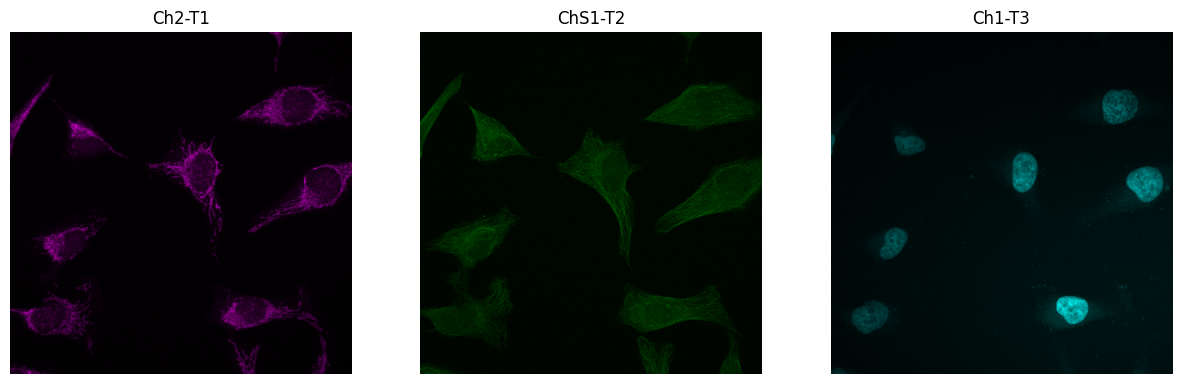

In [30]:
# Define the image path
image_path = "/content/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"

# Define a BioImage object
img = BioImage(image_path)
print(f'Image shape: {img.shape}')
print(f'Image dimensions: {img.dims.order}')
print(f'Image physical pixel sizes: {img.physical_pixel_sizes}')
print(f'Image channel names: {img.channel_names}')

# Create variables from metadata
channel_names = img.channel_names
image_scale = [img.physical_pixel_sizes.Z, img.physical_pixel_sizes.Y, img.physical_pixel_sizes.X]

# Create colormaps for each channel, e.g., from black to magenta
from matplotlib.colors import LinearSegmentedColormap
cmap_magenta = LinearSegmentedColormap.from_list("magenta", ['black', 'magenta'])
cmap_green =  LinearSegmentedColormap.from_list("green", ['black', 'green'])
cmap_cyan = LinearSegmentedColormap.from_list("cyan", ['black', 'cyan'])
cmap_list = [cmap_magenta, cmap_green, cmap_cyan]

# First, let use visualize the images in 2D using matplotlib
# The images are multi-dimensional. We will plot each channel in a separate subplot.
# For each channel we will use a maximum intensity projection (MIP).
import numpy as np
import matplotlib.pyplot as plt

# Make sure matplotlib is displayed inline in the notebook
%matplotlib inline

# Get the raw data as a numpy array
data = img.get_image_data("CZYX", T=0) # returns 4D CZYX numpy array
data_mip = np.max(data, axis=1) # returns 3D CYX numpy array (C=3, Y=1024, X=1024) containing MIP images.

# Create a figure with 3 subplots, 1 for each channel, arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, channel in enumerate(channel_names):
    data_mip_channel = data_mip[i,:,:] # Get the MIP image for the i-th channel
    cmap = plt.get_cmap(cmap_list[i]) # Get the colormap for the i-th channel
    axes[i].imshow(data_mip_channel, cmap=cmap)
    axes[i].set_title(channel) # Set the title of the subplot to the channel name
    axes[i].axis('off') # Remove the axis ticks
plt.show()

**Bonus:** Above, we used a for-loop. A for-loop iterates over the elements of the variable you give it. Think of it as "for each element in the list, do the following:". For example:

```python
for i in [a,b,c]:
    print(i)
```

In the example above, we also used `enumerate`. This is an iterable that returns both the indexes and the elements it is iterating over. For example:

```python
for i, element in enumerate([a,b,c]):
    print(i, element)
```

**Data plotting**

Besides visualizing 2D images, we can also use matplotlib to plot data.

For example, we can plot the intensity distribution of the different channels.


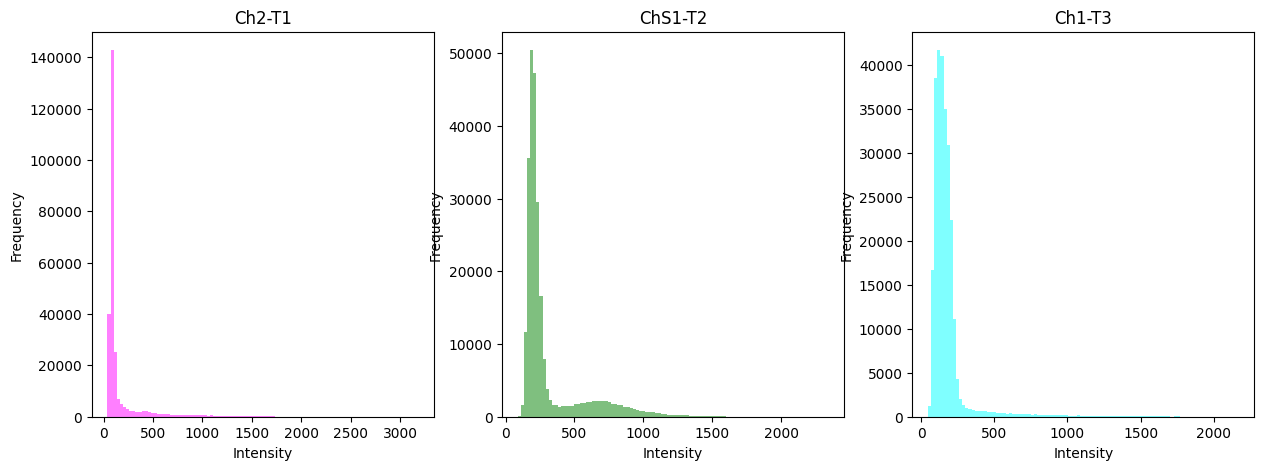

In [31]:
# Create a plot with the histograms of the different channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, channel in enumerate(channel_names):
    data_mip_channel = data_mip[i,:,:] # Get the MIP image for the i-th channel
    cmap = cmap_list[i] # Get the colormap for the i-th channel
    # Plot the histogram of the channel
    axes[i].hist(
        data_mip_channel.flatten(), # Flatten the image to a 1D array
        bins=100,
        color=cmap.name,
        alpha=0.5
        )
    axes[i].set_title(channel) # Set the title of the subplot to the channel name
    axes[i].set_xlabel('Intensity') # Set the x-axis label to 'Intensity'
    axes[i].set_ylabel('Frequency') # Set the y-axis label to 'Frequency'
plt.show()

## 2.2. Visualzing volumes with Stackview

Stackview is a convinient tool for visualizing  multi-dimensional data. Here, we will use it to visuale the 3D volume. To use it, we will first have to activate widgets in Google Colab.

In [41]:
# Activate widgets in google colab
from google.colab import output
output.enable_custom_widget_manager()

Now, let's use `stackview`'s `insight` function to display statistical information about the image.


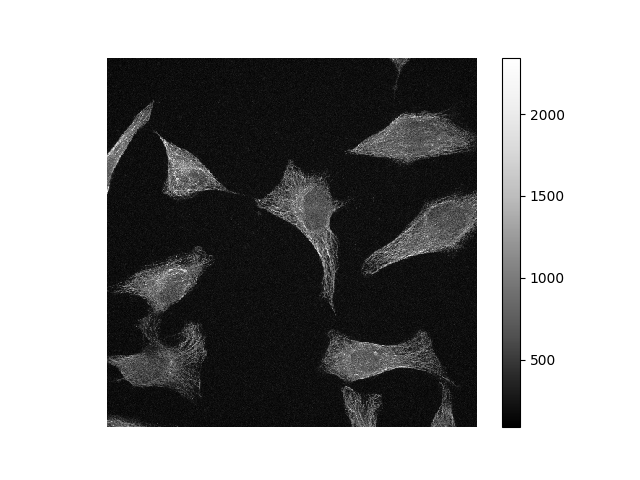
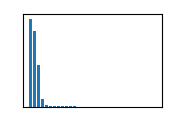

In [33]:
import stackview
stackview.insight(img.get_image_data("ZYX", C=1, T=0))

Visualze a different channel:

In [49]:
images = {
    "mitochondria": img.get_image_data("ZYX", C=0, T=0),
    "tubulin": img.get_image_data("ZYX", C=1, T=0),
    "nuclei": img.get_image_data("ZYX", C=2, T=0)
    }

stackview.switch(
    images,
    colormap=["pure_magenta", "pure_green", "pure_blue"],
    toggleable=True
)

Orthogonal views:

In [46]:
stackview.orthogonal(img.get_image_data("ZYX", C=1, T=0))

More options with stackview:
* side_by_side
* switch
* curtain

These will be used later to show the result of a cell segmentation

## Stackview References:
🔗 https://github.com/haesleinhuepf/stackview